In [1]:
import pandas as pd
import numpy as np
import Bio
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
trinity_DS2_raw = pd.read_csv("csv_data/MOJE_Trinity_DS2.csv", delimiter=";", header=1) 
trinity_M12_raw = pd.read_csv("csv_data/MOJE_Trinity_M12.csv", delimiter=";", header=1) 
trinity_RXL_raw = pd.read_csv("csv_data/MOJE_Trinity_RXL.csv", delimiter=";", header=1) 
# DS2/m12/rxl strains - full contig expression data set: 2w / 3bzw

In [3]:
ds2_raw = pd.read_csv("csv_data/Data2_DS2.csv", delimiter=";") 
m12_raw = pd.read_csv("csv_data/Data2_M12.csv", delimiter=";") 
rxl_raw = pd.read_csv("csv_data/Data2_RXL10.csv", delimiter=";") 

# DS2/m12/rxl stat data, proportin w/bzw and p-value

In [4]:
l = []
l.append(len(trinity_DS2_raw.columns))
l.append(len(ds2_raw.columns))
col_n = max(l)
pd.set_option('display.max_columns', col_n)

In [5]:
ds2_data = ds2_raw[["DS2bw/DS2.fc", "DS2bw/DS2.raw.pval"]].apply(lambda x: x.str.replace(",", "."))
trinity_DS2_r = trinity_DS2_raw[["DS2_1_FPKM", "DS2_2_FPKM", "DS2bw1_FPKM", "DS2bw2_FPKM", "DS2bw3_FPKM"]].apply(lambda x: x.str.replace(",", "."))

ds2_data = ds2_data[["DS2bw/DS2.fc", "DS2bw/DS2.raw.pval"]].apply(lambda x: pd.to_numeric(x, downcast="float"))
trinity_DS2_r = trinity_DS2_r[["DS2_1_FPKM", "DS2_2_FPKM", "DS2bw1_FPKM", "DS2bw2_FPKM", "DS2bw3_FPKM"]].apply(lambda x: pd.to_numeric(x,  downcast="float"))

ds2_data = pd.concat([ds2_raw["Contig"], ds2_data], axis=1)
trinity_DS2_r = pd.concat([trinity_DS2_raw["Name"], trinity_DS2_r], axis=1)

In [6]:
m12_raw.head()

,Contig,Length,GO,EGGNOG,M12bw/M12wn.fc,M12bw/M12wn.fc.sd,M12bw/M12wn.volume,M12bw/M12wn.stat_results,M12bw/M12wn.raw.pval,M12bw/M12wn.bh.pval,M12wn.mean,M12bw.mean,M12wn.sd,M12bw.sd,N_M12bw1,N_M12bw2,N_M12bw3,N_M12wn2,N_M12wn3,M12bw1_FPKM,M12bw2_FPKM,M12bw3_FPKM,M12wn2_FPKM,M12wn3_FPKM
0,c58_g1_i1,455,.,.,"-1,276247774","0,454664857","0,905767131","-1,290377529","0,292010346","0,722328464","1,098653515","0,74674507","0,181131221","0,417027113","1,22804716","0,51924075","0,4929473","0,9705744","1,22673263","1,31","0,39","0,36","1,05","1,53"
1,c76_g1_i1,216,.,.,"-1,00799192","0,608992785","0,99027081","-0,027868822","0,981077597","0,994577268","0,996029495","0,98454542","0,526398834","0,306229456","1,32868027","0,74208706","0,88286893","1,36824968","0,62380931","1,48","0,61","0,75","1,71","0,62"
2,c89_g1_i2,684,.,.,"-1,101817786","0,333888931","0,316533492","-0,62445012","0,610100799","0,868507054","0,39411169","0,254226033","0,279518109","0,18262378","0,0813036","0,23616539","0,44520911","0,59176084","0,19646254","0,06","0,16","0,32","0,56","0,17"
3,c89_g1_i1,789,.,.,"-1,070308508","0,417901827","0,511900648","-0,375730237","0,733171598","0,915922199","0,563255105","0,465228403","0,243141955","0,339888109","0,15307765","0,41528107","0,82732649","0,73518243","0,39132778","0,11","0,3","0,69","0,73","0,36"
4,c100_g1_i1,806,TAIR|locus:2134123 - symbol:AT4G32870 AT4G3287...,"15368.BRADI2G48630.1|ENOG411259T,S","1,123930958","0,162955358","0,23825735","1,783637124","0,209982482","0,678558233","0,168446715","0,33700013","0,02173514","0,161499326","0,45563389","0,40228885","0,15307765","0,18381578","0,15307765","0,36","0,29","0,1","0,15","0,13"


In [7]:
trinity_M12_raw.head()

,Name,M12wn2_FPKM,M12wn3_FPKM,M12bw1_FPKM,M12bw2_FPKM,M12bw3_FPKM,Length,Start,End,Coverage,Description,Length.1,Start.1,End.1,Coverage.1,Bit,E-Value,Match/Total,Pct.(%),Match/Total.1,Pct.(%).1,Match/Total.2,Pct.(%).2,Query
0,c95728_g1_i1,0,"0,18","0,21",0,0,341,211.0,35.0,"51,91","ZFIN|ZDB-GENE-010323-11 - symbol:enah ""enabled...",804.0,325.0,381.0,"7,09",35,"0,093",21/59,35.0,28/59,47.0,2/59,3.0,-2.0
1,c280_g1_i1,0,0,0,0,0,249,NaN,NaN,,No hit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c95935_g1_i1,0,0,0,0,0,247,5.0,202.0,"80,16","UNIPROTKB|F1N8N8 - symbol:LOC777317 ""Uncharact...",1215.0,825.0,884.0,"4,94","34,7","0,073",20/66,30.0,32/66,48.0,6/66,9.0,2.0
3,c97393_g1_i1,"0,75",0,0,0,0,202,NaN,NaN,,No hit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,c100156_g1_i1,0,"0,13","0,15",0,0,401,NaN,NaN,,No hit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
m12_data = m12_raw[["M12bw/M12wn.fc", "M12bw/M12wn.raw.pval"]].apply(lambda x: x.str.replace(",", "."))
trinity_m12_r = trinity_M12_raw[["M12wn2_FPKM", "M12wn3_FPKM", "M12bw1_FPKM", "M12bw2_FPKM", "M12bw3_FPKM"]].apply(lambda x: x.str.replace(",", "."))

m12_data = m12_data[["M12bw/M12wn.fc", "M12bw/M12wn.raw.pval"]].apply(lambda x: pd.to_numeric(x, downcast="float"))
trinity_m12_r = trinity_m12_r[["M12wn2_FPKM", "M12wn3_FPKM", "M12bw1_FPKM", "M12bw2_FPKM", "M12bw3_FPKM"]].apply(lambda x: pd.to_numeric(x,  downcast="float"))

m12_data = pd.concat([m12_raw["Contig"], m12_data], axis=1)
trinity_m12_r = pd.concat([trinity_M12_raw["Name"], trinity_m12_r], axis=1)

In [9]:
rxl_raw.head()

,Contig,Length,GO,EGGNOG,RXLbw/RXL.fc,RXLbw/RXL.fc.sd,RXLbw/RXL.volume,RXLbw/RXL.stat_results,RXLbw/RXL.raw.pval,RXLbw/RXL.bh.pval,RXL.mean,RXLbw.mean,RXL.sd,RXLbw.sd,N_RXL1,N_RXL2,N_RXLbw1,N_RXLbw2,RXL1_FPKM,RXL2_FPKM,RXLbw1_FPKM,RXLbw2_FPKM
0,c58_g1_i1,455,.,.,"-1,440768635","0,238170849","0,582509972","-3,128268671","0,168325974","0,893147197","0,902721785","0,375883105","0,065370148","0,229024228","0,94894546","0,85649811","0,53782769","0,21393852","0,92","0,95","0,43","0,14"
1,c75_g1_i1,999,.,.,"-1,12126676","0,366036147","0,588108242","-0,637992862","0,63667142","0,920537678","0,67644039","0,51131084","0,364110113","0,037500489","0,41897566","0,93390512","0,53782769","0,48479399","0,33","1,06","0,43","0,36"
2,c100_g1_i1,806,TAIR|locus:2134123 - symbol:AT4G32870 AT4G3287...,"15368.BRADI2G48630.1|ENOG411259T,S","1,046020318","0,223266267","0,178855471","0,411158573","0,725315947","0,940632125","0,149320895","0,21423177","0,126269352","0,184130054","0,06003498","0,23860681","0,08403216","0,34443138","0,04","0,21","0,06","0,24"
3,c105_g1_i1,555,.,.,"1,143526968","0,116375335","0,235440613","2,35132928","0,158561953","0,893147197","0,157797365","0,351287755","0,066180917","0,095725153","0,20459434","0,11100039","0,28359985","0,41897566","0,15","0,09","0,21","0,3"
4,c116_g1_i1,610,.,.,"-1,088904533","0,045345059","0,306068","-3,832280604","0,15912527","0,893147197","0,37361231","0,250734835","0,045146944","0,004234134","0,3416886","0,40553602","0,24774085","0,25372882","0,26","0,38","0,18","0,17"


In [10]:
trinity_RXL_raw.head()

,Name,RXL1_FPKM,RXL2_FPKM,RXLbw1_FPKM,RXLbw2_FPKM,Length,Start,End,Coverage,Description,Length.1,Start.1,End.1,Coverage.1,Bit,E-Value,Match/Total,Pct.(%),Match/Total.1,Pct.(%).1,Match/Total.2,Pct.(%).2,Query
0,c95728_g1_i1,0,0,0,0,341,211.0,35.0,"51,91","ZFIN|ZDB-GENE-010323-11 - symbol:enah ""enabled...",804.0,325.0,381.0,"7,09",35,"0,093",21/59,35.0,28/59,47.0,2/59,3.0,-2.0
1,c280_g1_i1,0,0,0,0,249,NaN,NaN,,No hit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c95935_g1_i1,0,0,0,0,247,5.0,202.0,"80,16","UNIPROTKB|F1N8N8 - symbol:LOC777317 ""Uncharact...",1215.0,825.0,884.0,"4,94","34,7","0,073",20/66,30.0,32/66,48.0,6/66,9.0,2.0
3,c97393_g1_i1,0,"0,94",0,0,202,NaN,NaN,,No hit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,c100156_g1_i1,0,0,"0,36",0,401,NaN,NaN,,No hit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
rxl_data = rxl_raw[["RXLbw/RXL.fc", "RXLbw/RXL.raw.pval"]].apply(lambda x: x.str.replace(",", "."))
trinity_RXL_r = trinity_RXL_raw[["RXL1_FPKM", "RXL2_FPKM", "RXLbw1_FPKM", "RXLbw2_FPKM"]].apply(lambda x: x.str.replace(",", "."))

rxl_data = rxl_data[["RXLbw/RXL.fc", "RXLbw/RXL.raw.pval"]].apply(lambda x: pd.to_numeric(x, downcast="float"))
trinity_RXL_r = trinity_RXL_r[["RXL1_FPKM", "RXL2_FPKM", "RXLbw1_FPKM", "RXLbw2_FPKM"]].apply(lambda x: pd.to_numeric(x,  downcast="float"))

rxl_data = pd.concat([rxl_raw["Contig"], rxl_data], axis=1)
trinity_RXL_r = pd.concat([trinity_RXL_raw["Name"], trinity_RXL_r], axis=1)

In [12]:
#get contgis name with p<0.05 from ds2_data

In [13]:
x = 0.01
y = 2
z = -2

In [14]:
ds2_data_selected = ds2_data[(ds2_data["DS2bw/DS2.raw.pval"] < x) & ((ds2_data["DS2bw/DS2.fc"] > y) | (ds2_data["DS2bw/DS2.fc"] < z))]
m12_data_selected = m12_data[(m12_data["M12bw/M12wn.raw.pval"] < x) & ((m12_data["M12bw/M12wn.fc"] > y) | (m12_data["M12bw/M12wn.fc"] < z))]
rxl_data_selected = rxl_data[(rxl_data["RXLbw/RXL.raw.pval"] < x) & ((rxl_data["RXLbw/RXL.fc"] > y) | (rxl_data["RXLbw/RXL.fc"] < z))]

In [15]:
ds2_data_selected.head()

,Contig,DS2bw/DS2.fc,DS2bw/DS2.raw.pval
3151,c25322_g1_i1,-2.252130,0.002141
3903,c30179_g1_i1,-2.510241,0.004303
5865,c40515_g1_i1,6.007777,0.003248
11650,c56910_g1_i1,2.505986,0.005064
28077,c73719_g1_i2,3.545663,0.008579


In [16]:
print("ds2_data")
ds2_data_selected.info()
print("-"*50)
print("m12_data")
m12_data_selected.info()
print("-"*50)
print("rxl_data")
rxl_data_selected.info()

ds2_data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 3151 to 85582
Data columns (total 3 columns):
Contig                33 non-null object
DS2bw/DS2.fc          33 non-null float32
DS2bw/DS2.raw.pval    33 non-null float32
dtypes: float32(2), object(1)
memory usage: 792.0+ bytes
--------------------------------------------------
m12_data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 913 to 79082
Data columns (total 3 columns):
Contig                  268 non-null object
M12bw/M12wn.fc          268 non-null float32
M12bw/M12wn.raw.pval    268 non-null float32
dtypes: float32(2), object(1)
memory usage: 6.3+ KB
--------------------------------------------------
rxl_data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 1479 to 75723
Data columns (total 3 columns):
Contig                31 non-null object
RXLbw/RXL.fc          31 non-null float32
RXLbw/RXL.raw.pval    31 non-null float32
dtypes: float32(2), object(1)
memory usage: 744.0+ byt

In [17]:
trinity_DS2 = trinity_DS2_r.set_index("Name", drop=True)
trinity_m12 = trinity_m12_r.set_index("Name", drop=True)
trinity_RXL = trinity_RXL_r.set_index("Name", drop=True)

In [18]:
trinity_DS2.head()

,DS2_1_FPKM,DS2_2_FPKM,DS2bw1_FPKM,DS2bw2_FPKM,DS2bw3_FPKM
Name,,,,,
c95728_g1_i1,0.0,0.00,0.0,0.0,0.00
c280_g1_i1,0.0,0.44,0.0,0.0,0.00
c95935_g1_i1,0.0,0.00,0.0,0.0,1.12
c97393_g1_i1,0.0,0.00,0.0,0.0,0.00
c100156_g1_i1,0.0,0.00,0.0,0.0,0.24


In [19]:
ds2_data_selected_ready = ds2_data_selected.set_index("Contig", drop=True)
m12_data_selected_ready = m12_data_selected.set_index("Contig", drop=True)
rxl_data_selected_ready = rxl_data_selected.set_index("Contig", drop=True)

In [20]:
selected_contigs_ds = list(ds2_data_selected_ready.index)
selected_contigs_m = list(m12_data_selected_ready.index)
selected_contigs_rxl = list(rxl_data_selected_ready.index)

In [21]:
trinity_DS2_selcted = trinity_DS2.loc[selected_contigs_ds]
trinity_M12_selcted = trinity_m12.loc[selected_contigs_m] 
trinity_RXL_selcted = trinity_RXL.loc[selected_contigs_rxl] #trinity data set selcected contgis based off ds2_data_selected

In [22]:
sns.set(rc={'figure.figsize':(20,12)})

[Text(0, 0.5, 'expression level'), Text(0.5, 0, 'Line name')]

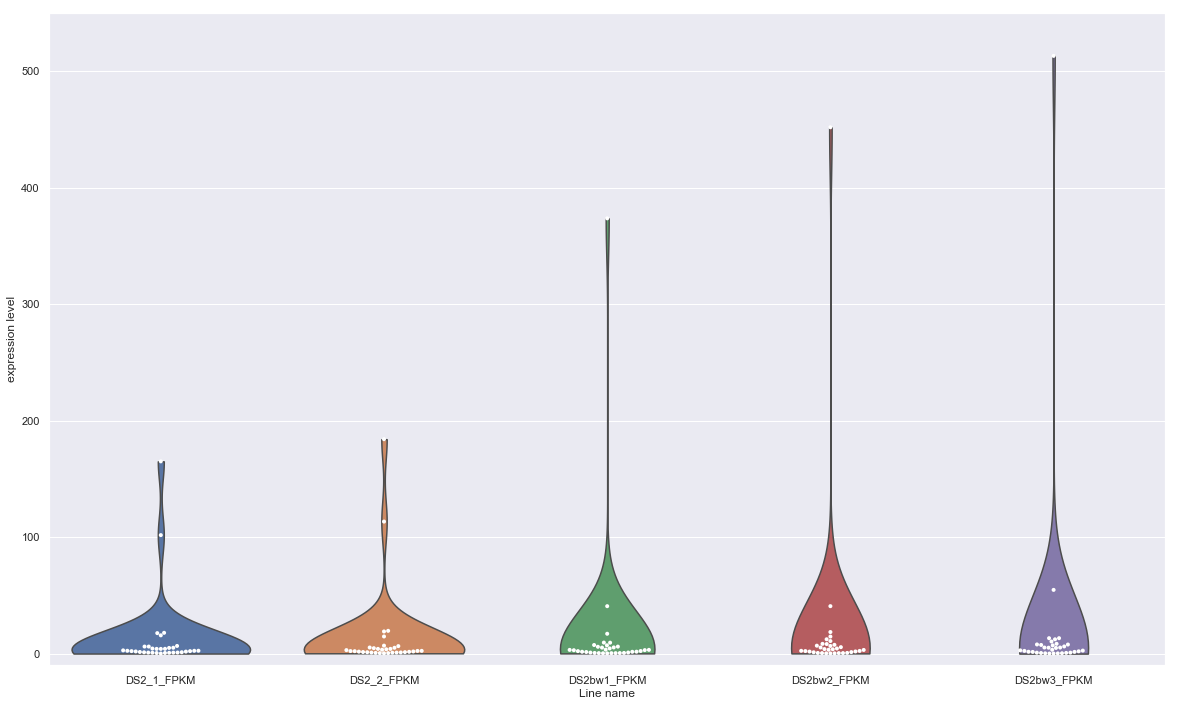

In [23]:
ax = sns.violinplot(data=trinity_DS2_selcted, inner=None, cut=0)
ax = sns.swarmplot(data=trinity_DS2_selcted, color="white", size=4)
ax.set(ylim=(-10, 550))
ax.set(xlabel='Line name', ylabel='expression level')

[Text(0, 0.5, 'expression level'), Text(0.5, 0, 'Line name')]

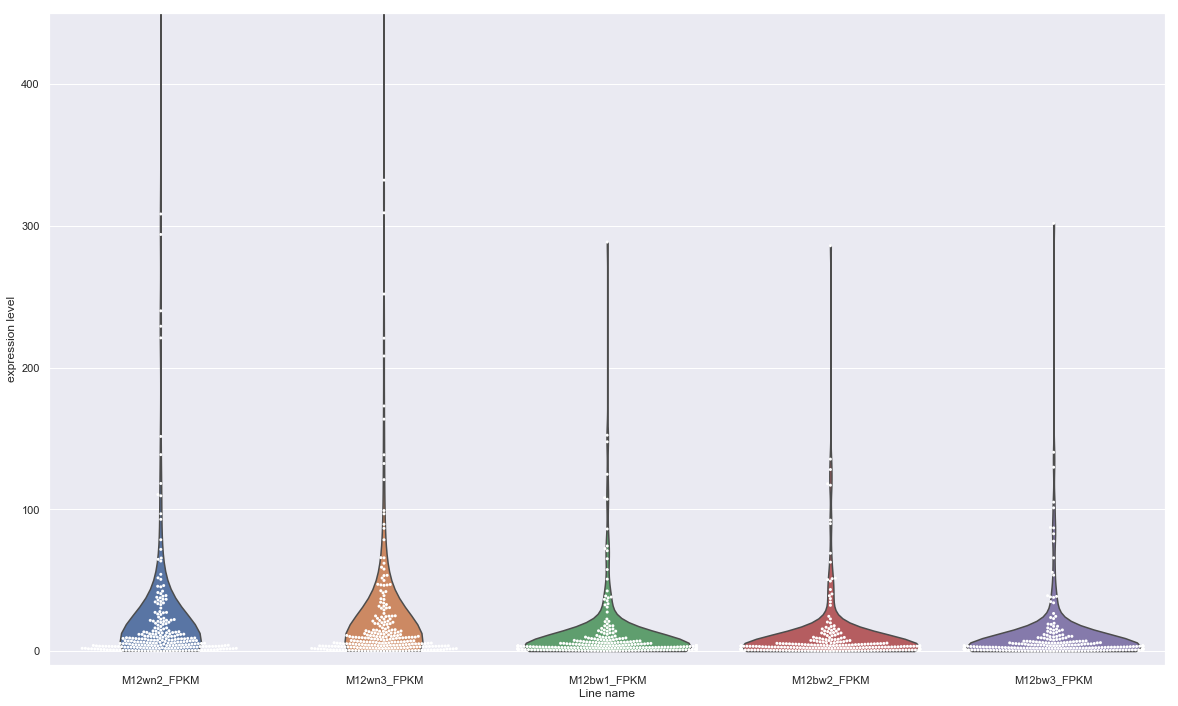

In [24]:
ax = sns.violinplot(data = trinity_M12_selcted, cut=0, inner=None)
ax.set(ylim=(-10, 450))
ax = sns.swarmplot(data=trinity_M12_selcted, color="white", size=3)
ax.set(xlabel='Line name', ylabel='expression level')

[Text(0, 0.5, 'expression level'), Text(0.5, 0, 'Line name')]

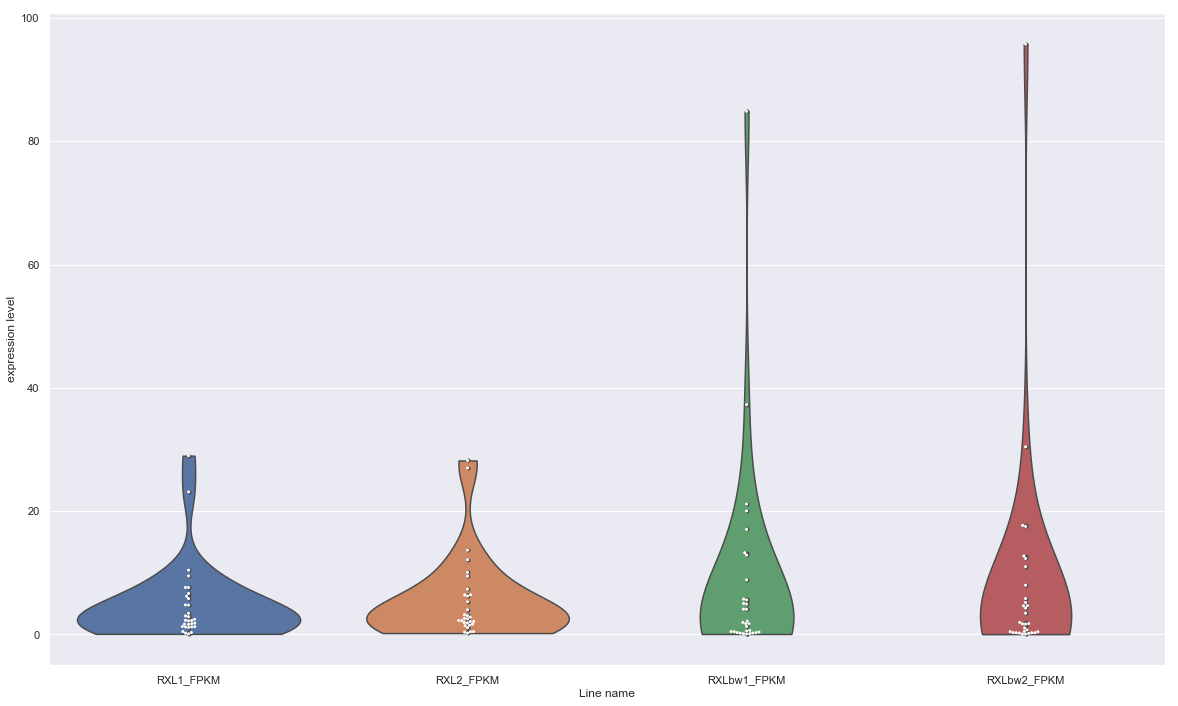

In [25]:
ax = sns.violinplot(data = trinity_RXL_selcted, cut=0, inner="point")
ax = sns.swarmplot(data=trinity_RXL_selcted, color="white", size=3)

ax.set(xlabel='Line name', ylabel='expression level')

In [26]:
trinity_DS2_selcted.to_csv("wstępne_opracowanie/trinity_DS2_selcted.csv", sep=',')
trinity_DS2_selcted.head()

,DS2_1_FPKM,DS2_2_FPKM,DS2bw1_FPKM,DS2bw2_FPKM,DS2bw3_FPKM
Name,,,,,
c25322_g1_i1,2.81,3.04,0.51,0.49,0.83
c30179_g1_i1,2.46,2.13,0.23,0.23,0.20
c40515_g1_i1,0.91,0.47,6.05,12.34,7.82
c56910_g1_i1,0.94,1.01,3.03,4.43,3.34
c73719_g1_i2,0.78,1.21,3.47,6.61,7.10


In [27]:
trinity_M12_selcted.to_csv("wstępne_opracowanie/trinity_M12_selcted.csv", sep=',')
trinity_M12_selcted.head()

,M12wn2_FPKM,M12wn3_FPKM,M12bw1_FPKM,M12bw2_FPKM,M12bw3_FPKM
Name,,,,,
c8449_g1_i1,118.220001,163.570007,35.59,17.35,17.530001
c26664_g1_i1,0.560000,0.620000,2.22,2.11,2.620000
c26737_g1_i1,20.230000,22.670000,6.24,5.67,7.010000
c27015_g1_i1,3.890000,4.590000,1.49,0.99,1.100000
c27015_g2_i1,4.540000,5.260000,1.59,1.07,0.990000


In [28]:
trinity_RXL_selcted.to_csv("wstępne_opracowanie/trinity_RXL_selcted.csv", sep=',')
trinity_RXL_selcted.head()

,RXL1_FPKM,RXL2_FPKM,RXLbw1_FPKM,RXLbw2_FPKM
Name,,,,
c11125_g1_i2,0.210000,0.46,5.61,4.65
c19698_g1_i1,1.140000,1.12,5.74,5.82
c36932_g2_i1,23.120001,27.00,4.12,4.28
c37911_g1_i1,9.490000,12.12,0.59,0.75
c38443_g1_i2,6.190000,7.34,1.30,1.05


### Data searching in NCBI by contigs name from FASTA files

In [29]:
from Bio import SeqIO
from Bio.Blast import NCBIWWW
id_list = []
seq_list = []

In [30]:
from Bio import SearchIO

In [50]:
from Bio.Blast import NCBIXML

In [32]:
#replacment tab to \n 
with open("Trinity.fasta", "r") as handle:
    data = handle.read()

data_out = data.replace("	", "\n")

with open("Trinity_ready.fasta", "w") as out:
    out.write(data_out)

In [33]:
with open("Trinity_ready.fasta", "r") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        id_list.append(record.id)
        seq_list.append(record.seq)
query_dict = dict(zip(id_list, seq_list))

In [34]:
querry = str(query_dict.get("c7_g1_i1"))

In [111]:
querry

'ATATGTTGTGAATGTTTATAATGTCCCTTGTGCTCGTGGGTATATGATAGTGAACCATTCAAAAAATATTGTCATAAAATCGTAAAATGAGCAAAAGAACCGGTCGCAAGCCGAAACGTGAACGTACGTCAAGGCGACGTACTAGGCGTCATTCTTCTACGTCTGAAACATCTTCAGAAGATGTGCCACCCCCCAAAGTTGGCAAAACCCGAGCTACTAGCAGAGTTGATGAGGGTGAAAGGAAGGTTGCATTAACTATAAAATTGCCAAAGCCAGAAAGTAATGATTGCAATGAAGAGAACACCACTGGTATGTGGAAAGTTGAGTGTTCCAATGGAT'

In [83]:
result_handle = NCBIWWW.qblast("blastn", "nt", querry, format_type="XML")

In [84]:
with open("blast.xml", "w") as save_to:
    save_to.write(result_handle.read())
    result_handle.close()

In [99]:
E_VALUE_THRESH = 0.1
result_handle = open("blast.xml", 'r')
blast_records = NCBIXML.parse(result_handle)
blast_record = next(blast_records)

for alignment in blast_record.alignments:
    for hsp in alignment.hsps:
        if hsp.expect < E_VALUE_THRESH:
            print('****Alignment****')
            print('sequence:', alignment.title)
            print('length:', alignment.length)
            print('e value:', hsp.expect)
            print("-"*100)
            #print(hsp.query[0:75] + '...')
            #print(hsp.match[0:75] + '...')
            #print(hsp.sbjct[0:75] + '...')

****Alignment****
sequence: gi|1503142766|ref|XM_026950540.1| PREDICTED: Rhopalosiphum maidis apoptotic chromatin condensation inducer in the nucleus (LOC113549306), mRNA
length: 3144
e value: 9.82566e-170
----------------------------------------------------------------------------------------------------
****Alignment****
sequence: gi|1410999762|ref|XM_025338825.1| PREDICTED: Melanaphis sacchari apoptotic chromatin condensation inducer in the nucleus-like (LOC112594169), mRNA
length: 3035
e value: 1.367e-142
----------------------------------------------------------------------------------------------------
****Alignment****
sequence: gi|1028710480|ref|XM_001949761.4| PREDICTED: Acyrthosiphon pisum apoptotic chromatin condensation inducer in the nucleus (LOC100164637), mRNA
length: 4082
e value: 3.66816e-137
----------------------------------------------------------------------------------------------------
****Alignment****
sequence: gi|1229907084|ref|XM_022318775.1| PREDICTED: Myzus

### ML (Logistic regression and KNN modules)

In [ ]:
try:
    del trinity_DS2_selcted.index.name
    del trinity_M12_selcted.index.name
    del trinity_RXL_selcted.index.name
except:
    pass

In [ ]:
trinity_ds2_ready = trinity_DS2_selcted.transpose()
trinity_m12_ready = trinity_M12_selcted.transpose()
trinity_rxl_ready = trinity_RXL_selcted.transpose()

In [ ]:
trinity_ds2_ready_r = trinity_ds2_ready.reset_index()
trinity_m12_ready_r = trinity_m12_ready.reset_index()
trinity_rxl_ready_r = trinity_rxl_ready.reset_index()
trinity_ds2_ready_r.head()

In [ ]:
try:
    trinity_ds2_ready_r["index"].replace(["DS2_1_FPKM", "DS2_2_FPKM"], 1, inplace=True)
    trinity_m12_ready_r["index"].replace(["M12wn2_FPKM", "M12wn3_FPKM"], 1, inplace=True)
    trinity_rxl_ready_r["index"].replace(["RXL1_FPKM", "RXL2_FPKM"], 1, inplace=True)

    trinity_ds2_ready_r["index"].replace(["DS2bw1_FPKM", "DS2bw2_FPKM", "DS2bw3_FPKM"], 0, inplace=True)
    trinity_m12_ready_r["index"].replace(["M12bw1_FPKM", "M12bw2_FPKM", "M12bw3_FPKM"], 0, inplace=True)
    trinity_rxl_ready_r["index"].replace(["RXLbw1_FPKM", "RXLbw2_FPKM"], 0, inplace=True)

except():
    pass
trinity_ds2_ready_r.columns

In [ ]:
col_x = list(trinity_ds2_ready_r.columns)
col_x[0] = "Class"
trinity_ds2_ready_r.columns = col_x

col_x = list(trinity_m12_ready_r.columns)
col_x[0] = "Class"
trinity_m12_ready_r.columns = col_x

col_x = list(trinity_rxl_ready_r.columns)
col_x[0] = "Class"
trinity_rxl_ready_r.columns = col_x

In [ ]:
print("trinity_ds2_ready")
trinity_ds2_ready.info()
print("-"*50)
print("trinity_m12_ready")
trinity_m12_ready.info()
print("-"*50)
print("trinity_rxl_ready")
trinity_rxl_ready.info()

In [ ]:
trinity_ds2_ready_r.head()

In [ ]:
trinity_m12_ready_r.head()

In [ ]:
trinity_rxl_ready_r.head()

In [ ]:
reduce_con_list = trinity_rxl_ready_r.columns.tolist()
m12_list = trinity_m12_ready_r.columns.tolist()
ds2_list = trinity_ds2_ready_r.columns.tolist()

reduce_con_list = set(reduce_con_list)
m12_list = set(m12_list)
ds2_list = set(ds2_list)

contigs = list(ds2_list.intersection(m12_list, reduce_con_list))
contigs_r = []

for e in contigs:
    if e != "Class":
        contigs_r.append(e)
    else:
        continue

In [ ]:
len(contigs)

In [ ]:
if len(contigs_r) > 1:
    trinity_rxl_ready = trinity_rxl_ready_r[contigs]
    trinity_m12_ready = trinity_m12_ready_r[contigs]
    trinity_ds2_ready = trinity_ds2_ready_r[contigs]

    dataf = pd.concat([trinity_ds2_ready, trinity_m12_ready, trinity_rxl_ready])
    x_set = dataf.columns.tolist()    
else:
    print("No data, change selection parameters")

In [ ]:
y = dataf["Class"]
x = dataf[x_set]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.7)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
lg = LogisticRegression(solver="lbfgs")
lg.fit(X_train,y_train)

In [ ]:
predictions = lg.predict(X_test)
predictions

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
scal = StandardScaler()
scal.fit(x)
scaled_features = scal.transform(x)
x.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
knn.fit(X_train,y_train)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
pred

In [ ]:
print(confusion_matrix(y_test,pred))

In [ ]:
error_rate = []
for i in range(1,4):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,4),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')